# Prepare input data

**1. Connect to google drive and see if the input file is there**

In [ ]:
# import google drive module and mount it
from google.colab import drive
drive.mount('/content/drive')

# list the files on the path just to check if our file is actually there
import os
path = "/content/drive/MyDrive/ML" #change your_subfolder to the actual subfolder name
for filename in os.listdir(path):
  print(filename)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
table.dat
inputs.dat


**2a. Read the input file from Google Drive**

In [ ]:
# Specify the correct path to your file!!
path = "/content/drive/MyDrive/ML/inputs.dat"  # Update with the correct path

table = []
a_file = open(path)
for row in a_file:
  tokens = row.split()
  table.append(tokens)

print(table[0:5])


[['16', '0', '4', '14', '*', '68'], ['14', '2', '0', '8', '*', '238'], ['12', '1', '1', '11', '*', '198-202'], ['8', '0', '0', '8', '133', '75'], ['16', '0', '0', '14', '350', '152']]


**2a. Read the input file from GitHub**

In [9]:
import base64
import requests

input_data="https://raw.githubusercontent.com/dgront/chem-ml/refs/heads/main/INPUTS/melting_temperatures/boiling_melting.tsv"
req = requests.get(input_data)
table = []
for row in req.text.splitlines():
  tokens = row.split("\t")
  table.append(tokens)

print(table[0:5])

[['(1,1&#x27;-Biphenyl)-2,5-Diol, Diacetate', 'C16H14O4', '', '68'], ['(1,1&#x27;-Biphenyl)-4,4&#x27;-Dicarbonitrile', 'C14H8N2', '', '238'], ['(1,1&#x27;-Biphenyl)-4-Ol, 3-Amino-', 'C12H11NO', '', '198-202'], ['(1,2-Dibromoethyl)benzene', 'C8H8Br2', '133', '75'], ['(1,4-Diphenyl)-1,3-Butadiene', 'C16H14', '350', '152']]


 **Convert the file content to input for training**

In [ ]:
features = []   # input features
labels = []     # expected labels
for row in table:
  try:
    v = float(row[5])
    labels.append([v])
    features.append([float(row[0]), float(row[1]), float(row[2]), float(row[3])])
  except:
    pass

print(features[0:5])
print(labels[0:5])

[[16.0, 0.0, 4.0, 14.0], [14.0, 2.0, 0.0, 8.0], [8.0, 0.0, 0.0, 8.0], [16.0, 0.0, 0.0, 14.0], [10.0, 0.0, 1.0, 16.0]]
[[68.0], [238.0], [75.0], [152.0], [5.0]]


**Import tensorflow libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

 **Convert from Python arrays to tensorflow tensors**

In [ ]:
X = tf.convert_to_tensor(features)
Y = tf.convert_to_tensor(labels)
print(X.shape)
print(Y.shape)


(9301, 4)
(9301, 1)


# Build and train the model

**Buitd the mode i.e. the neural network**

In [ ]:
model = keras.Sequential([
        layers.Dense(4, activation='relu'),  # First hidden layer with 4 neurons
    layers.Dense(20, activation='relu'),  # Second hidden layer with 20 neurons
    layers.Dense(20, activation='relu'),  # Third hidden layer with 20 neurons
#    layers.Dense(20, activation='relu'),  # 4th hidden layer with 20 neurons (added as an example that it makes the results worse!)
    layers.Dense(1, activation='linear')  # Output layer for regression
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

**Train the model**

In [ ]:
#history = model.fit(X, Y, epochs=20, batch_size=100, validation_data=(X, Y))
history = model.fit(X, Y, epochs=50, batch_size=32, validation_split=0.3)

Epoch 1/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8618.0605 - mae: 61.8862 - val_loss: 14588.6250 - val_mae: 68.8333
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6803.5068 - mae: 59.7817 - val_loss: 14515.4736 - val_mae: 68.1818
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6723.9263 - mae: 59.0031 - val_loss: 14515.6680 - val_mae: 68.0230
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6600.8193 - mae: 58.6070 - val_loss: 14567.5068 - val_mae: 68.3185
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7892.6807 - mae: 59.6174 - val_loss: 14464.5000 - val_mae: 67.8153
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10182.4424 - mae: 60.8246 - val_loss: 14423.0586 - val_mae: 67.3850
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7451.0806 - mae: 58.6024 - val_loss: 14497.0938 - val_mae: 68.1089
Epoch 8/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9424.3311 - mae: 59.0399 - val_loss: 14346.0771 - 

**Plot training loss**

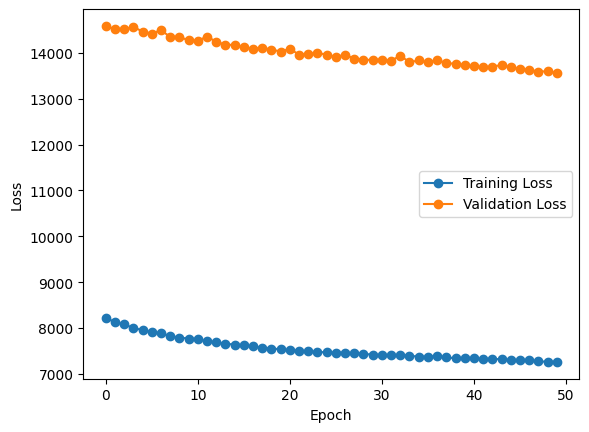

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.legend()
plt.ylabel('Loss')
plt.show()

In [ ]:
ethanol = [2.0, 1.0, 0.0, 6.0] # C, O, N, H
ethanol = tf.convert_to_tensor(ethanol)
ethanol = tf.reshape(ethanol, [1, 4])
model.predict([ethanol])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(1, 4))',)
  warnings.warn(msg)


array([[28.732103]], dtype=float32)